# **Introduction to Generative AI and its Applications**

Generative AI is a branch of artificial intelligence that focuses on developing algorithms that can create new data, such as text, images, audio, and video. Generative AI models are trained on large datasets of existing data, and they learn to identify the patterns and structures in the data. Once trained, these models can be used to generate new data that is similar to the data they were trained on, but also unique and original.

# **Generative AI has a wide range of applications in data science, including:**

Data augmentation: Generative AI can be used to create synthetic data to augment existing datasets. This can be useful for tasks where there is limited labeled data, or where the data is expensive or difficult to collect. For example, generative AI can be used to create synthetic images of medical scans, or synthetic text data for natural language processing tasks.
Creative content generation: Generative AI can be used to generate creative content, such as music, art, and literature. This can be used for a variety of purposes, such as developing new forms of entertainment, or creating new tools for artists and designers.
Data exploration and analysis: Generative AI can be used to explore and analyze data in new ways. For example, generative AI can be used to generate new hypotheses about the data, or to identify patterns and anomalies that would be difficult to find manually.
The Relevance of Data Generation in Various Data Science Tasks

Data generation is a fundamental task in data science. It is often necessary to generate new data to train machine learning models, to evaluate the performance of models, and to explore and analyze data.

For example, machine learning models need to be trained on large datasets of labeled data. In many cases, it is difficult or expensive to collect labeled data. Generative AI can be used to create synthetic labeled data to augment existing datasets, or to create new labeled data from scratch.

Another important use case for data generation is evaluating the performance of machine learning models. Once a model is trained, it is important to evaluate its performance on a held-out test dataset. However, it is often difficult to collect a large enough and representative test dataset. Generative AI can be used to create synthetic test datasets that are similar to the real-world data that the model will encounter.

Finally, data generation can be used to explore and analyze data in new ways. For example, generative AI can be used to generate new hypotheses about the data, or to identify patterns and anomalies that would be difficult to find manually.

# **Theoretical Underpinnings of Generative AI Techniques**

Generative AI techniques are based on a variety of machine learning algorithms, such as neural networks, variational autoencoders, and generative adversarial networks.

Neural networks are a type of machine learning algorithm that can be used to learn complex patterns in data. Neural networks are often used to train generative AI models, as they can learn the underlying distributions of data and generate new data that is similar to the data they were trained on.

Variational autoencoders (VAEs) are a type of generative AI model that learns to represent data in a latent space. The latent space is a lower-dimensional representation of the data that captures the most important information. VAEs can be used to generate new data by sampling from the latent space and decoding the samples back to the original data space.

Generative adversarial networks (GANs) are a type of generative AI model that consists of two competing neural networks: a generator and a discriminator. The generator produces new data, and the discriminator tries to distinguish between real data and generated data. GANs are often used to generate high-quality images and videos.

# **How Generative AI Contributes to Solving Data-Related Problems**

Generative AI can be used to solve a variety of data-related problems, including:

Data scarcity: Generative AI can be used to create synthetic data to augment existing datasets, or to create new datasets from scratch. This can be useful for tasks where there is limited labeled data, or where the data is expensive or difficult to collect.
Data bias: Generative AI can be used to create datasets that are more representative of the real world, and less biased. This can help to improve the performance of machine learning models on real-world data.
Data privacy: Generative AI can be used to create synthetic data that is indistinguishable from real data, but does not contain any sensitive or confidential information. This can be used to protect the privacy of individuals and organizations when sharing data.
Conclusion

Generative AI is a powerful tool that can be used to solve a variety of data-related problems. It has a wide range of applications in data science, including data augmentation, creative content generation, and data exploration and analysis. Generative AI is still an active area of research, but it is already having a significant impact on the field



# **The theoretical foundations behind generative AI.**

Generative AI is grounded in the theoretical foundations of probability and statistics, generative modeling, autoencoders, Markov models, deep learning, recurrent networks, adversarial learning, latent spaces, information theory, reinforcement learning, and Monte Carlo methods. It leverages these principles to develop models capable of generating new data, whether in the form of text, images, or other content, with applications spanning natural language processing, computer vision, data augmentation, and creative content generation. The field continues to advance as researchers explore novel techniques and models to expand the boundaries of generative AI.

In [28]:
!pip install tiktoken

In [29]:
!pip install transformers

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


In [31]:
data =  pd.read_csv('/IMDB_movie_reviews.csv')

In [32]:
data.describe()

,Movie_title,User_name,Review_title,Review_rating,Review_date,Review_body
count,15279,15279,15279,15279,15279,11512
unique,4,14534,13907,10,1476,11499
top,Captain Marvel,rupert-ian,Disappointing,1/10,9 March 2019,"As a life long marvel fan, I am deeply saddene..."
freq,7297,6,44,3672,1159,2


In [33]:
# We need to check null values in dataset
data.isnull().sum()

Movie_title         0
User_name           0
Review_title        0
Review_rating       0
Review_date         0
Review_body      3767
dtype: int64

In [34]:
# To check duplicated values
data.duplicated().value_counts()

False    15277
True         2
dtype: int64

In [35]:
duplicates = data[data.duplicated()]
print(duplicates)

                   Movie_title        User_name  \
4934  Star Wars: The Last Jedi        icenash99   
6838  Star Wars: The Last Jedi  dgardiner-16144   

                       Review_title Review_rating      Review_date Review_body  
4934  Worse than the Phantom Menace          1/10  4 November 2019         NaN  
6838  Worse than the Phantom Menace          4/10   1 January 2018         NaN  


Probably a coincedence or may be a fake review, lets find out.


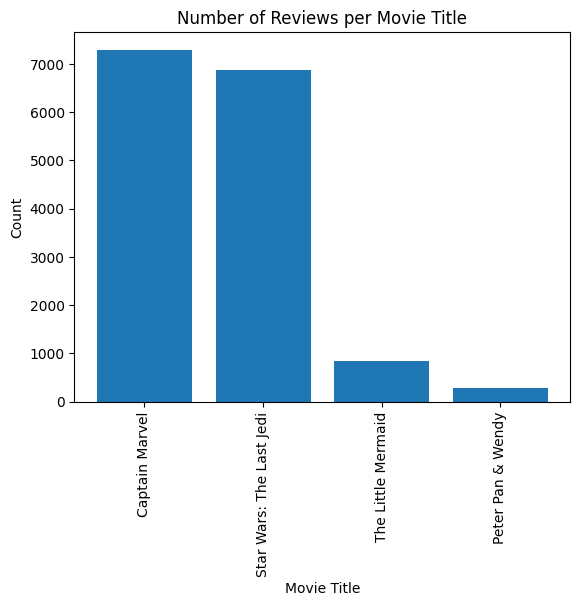

In [36]:

# Bar chart for Movie_title
movie_title_counts = data['Movie_title'].value_counts()
plt.bar(movie_title_counts.index, movie_title_counts.values)
plt.xlabel('Movie Title')
plt.ylabel('Count')
plt.title('Number of Reviews per Movie Title')
plt.xticks(rotation=90)
plt.show()


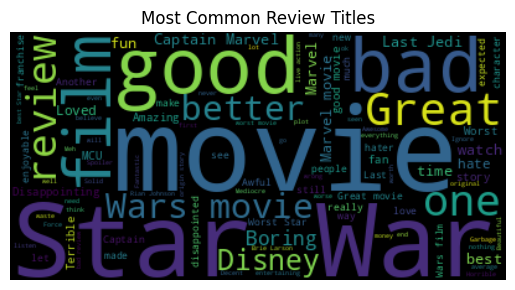

In [37]:
# Word cloud for Review_title
review_title_wordcloud = WordCloud().generate(' '.join(data['Review_title']))
plt.imshow(review_title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Review Titles')
plt.show()

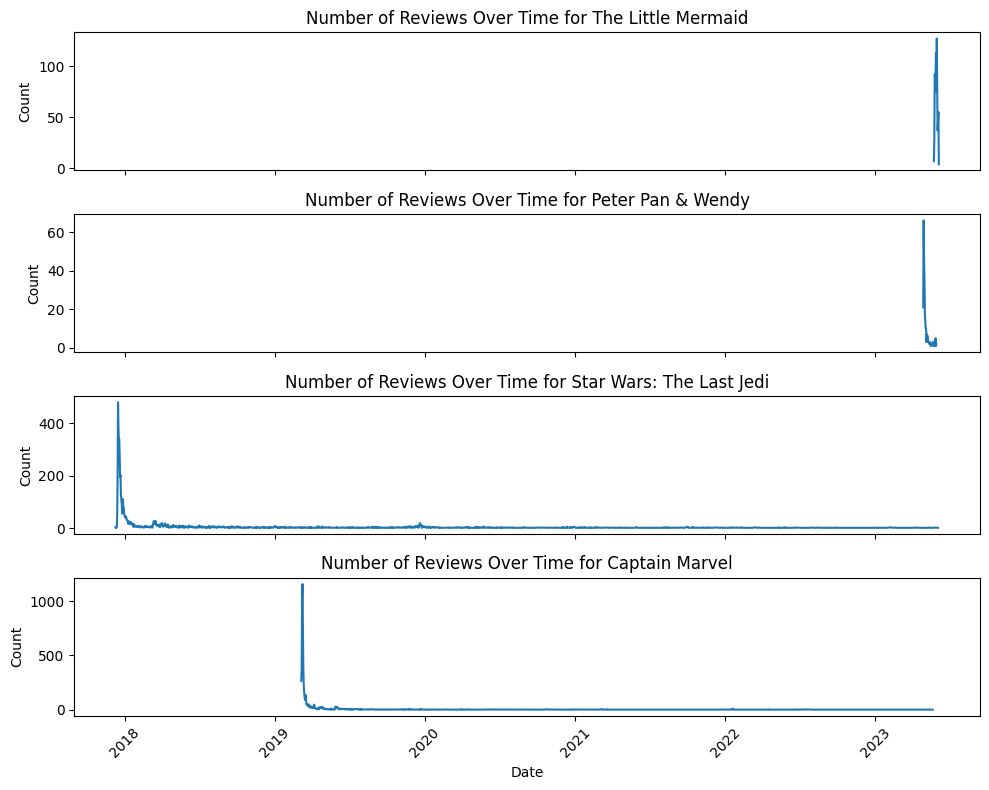

In [38]:

data['Review_date'] = pd.to_datetime(data['Review_date'])
movies = data['Movie_title'].unique()
fig, axs = plt.subplots(len(movies), 1, figsize=(10, 8), sharex=True)

for i, movie in enumerate(movies):
    movie_data = data[data['Movie_title'] == movie]
    review_date_counts = movie_data['Review_date'].value_counts().sort_index()
    axs[i].plot(review_date_counts.index, review_date_counts.values)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Number of Reviews Over Time for {movie}')
    axs[i].tick_params(axis='x', rotation=45)
plt.xlabel('Date')
plt.tight_layout()
plt.show()




In [39]:
filtered_df = data.loc[data['Review_rating'] == '1/10', ['Movie_title','Review_title', 'Review_rating', 'Review_body']]

In [40]:
filtered_df.head()

,Movie_title,Review_title,Review_rating,Review_body
3,The Little Mermaid,My daughter was bored to tears,1/10,I took my seven year old to see this last nigh...
13,The Little Mermaid,Another pointless remake that's worse than the...,1/10,The latest in Disney's attempt to cash in on a...
23,The Little Mermaid,I went in expecting this to be bad and was som...,1/10,By far the absolute worst Disney live action r...
26,The Little Mermaid,Unapologetically mediocre,1/10,"The Little Mermaid is like a Disney parade, a ..."
29,The Little Mermaid,No Disney Magic,1/10,I took my children to watch this over the Memo...


In [41]:
filtered_df = filtered_df.dropna(subset=['Review_title'])

In [42]:
filtered_df.count()

Movie_title      3672
Review_title     3672
Review_rating    3672
Review_body      2741
dtype: int64

In [43]:
# Group by 'Movie_title' and aggregate 'Review_title' into a single sentence
result_df = filtered_df.groupby('Movie_title')['Review_title'].apply(lambda x: ' '.join(x)).reset_index()

print(result_df)

                Movie_title                                       Review_title
0            Captain Marvel  Practically nothing good about it besides the ...
1         Peter Pan & Wendy  Disappointed Enough with the Live Action! Anot...
2  Star Wars: The Last Jedi  An embarrassment for the Star Wars fans What t...
3        The Little Mermaid  My daughter was bored to tears Another pointle...


# **Overview of the Data Generation Process Using Generative AI**

Generative AI is a branch of artificial intelligence that focuses on developing algorithms that can create new data, such as text, images, audio, and video. Generative AI models are trained on large datasets of existing data, and they learn to identify the patterns and structures in the data. Once trained, these models can be used to generate new data that is similar to the data they were trained on, but also unique and original.

The data generation process using generative AI typically involves the following steps:

Collect a large dataset of existing data. This dataset should be representative of the type of data that you want to generate.
Train a generative AI model on the dataset. This process can be computationally expensive, and it can take several hours or even days to train a model on a large dataset.
Generate new data using the trained model. This process is typically very fast, and it can be used to generate large amounts of new data in a short period of time.

# **Context and Significance of Data Generation**

Data generation is a fundamental task in many different fields, including machine learning, data science, and artificial intelligence. There are many different reasons why data generation is important, including:

To create new datasets for training machine learning models. Machine learning models are trained on data, and the more data they are trained on, the better they will perform. However, it can be difficult and expensive to collect real-world data. Generative AI can be used to create synthetic data to augment existing datasets, or to create new datasets from scratch.
To explore and analyze data in new ways. Generative AI can be used to generate new hypotheses about data, or to identify patterns and anomalies that would be difficult to find manually.
To create creative content. Generative AI can be used to generate new forms of creative content, such as music, art, and literature.
To protect privacy. Generative AI can be used to create synthetic data that is indistinguishable from real data, but does not contain any sensitive or confidential information.

# **Principles Behind Data Generation**

Generative AI models are based on a variety of machine learning algorithms, such as neural networks, variational autoencoders, and generative adversarial networks. These algorithms work by learning the patterns and structures in the data, and then using this knowledge to generate new data that is similar to the data they were trained on.

One of the key principles behind data generation is that it is important to generate data that is realistic and representative of the real world. This can be achieved by training generative AI models on large and diverse datasets. Another important principle is that it is important to generate data that is useful for the intended purpose. This can be achieved by carefully designing the training data and the generative AI model.

# **Benefits of Using Generative AI for Data Generation**

There are many benefits to using generative AI for data generation, including:

Scalability: Generative AI can be used to generate large amounts of data in a short period of time. This is important for applications where large amounts of data are needed, such as training machine learning models.
Cost-effectiveness: Generative AI can be used to generate data that is cheaper than collecting real-world data. This is important for applications where data collection is expensive or difficult.
Privacy: Generative AI can be used to generate synthetic data that is indistinguishable from real data, but does not contain any sensitive or confidential information. This is important for applications where data privacy is a concern.
Conclusion

Generative AI is a powerful tool that can be used to generate data for a variety of purposes. It is important to understand the context, significance, principles, and benefits of using generative AI for data generation in order to use it effectively.


# **What is the generative AI technique being utilized?**

The generative AI technique being utilized in the code you provided is sequence-to-sequence (seq2seq) modeling, specifically using models like BART (Bidirectional and Auto-Regressive Transformers) and GPT-2. Seq2seq models are commonly used for tasks like text summarization, text generation, and language understanding.

1.In the first part of the code, a BART model is used to summarize audience reviews of movies. The BART model is a seq2seq model designed for text summarization tasks.

2.In the second part of the code, a GPT-2 model is used to generate new text based on existing data. GPT-2 is also a seq2seq model, but it is often used for text generation tasks, where it can generate coherent and contextually relevant text based on a given prompt.

3.The final part of the code demonstrates the use of GPT-2 to generate a summarized version of input text.

In both cases, the models take input text and generate output text, making them powerful tools for a variety of natural language processing tasks.

# **Why is it interesting and relevant in data science?**

The use of generative AI techniques like sequence-to-sequence (seq2seq) modeling, as demonstrated in the provided code, is interesting and relevant in data science for several reasons:

1. **Text Summarization**: Seq2seq models, such as BART, can be used for text summarization tasks, which are essential in data science for condensing and extracting key information from large textual datasets. This is particularly useful for generating concise summaries of customer reviews, news articles, research papers, and more.

2. **Content Generation**: Models like GPT-2 are valuable for generating new text content based on existing data. Data scientists can use these models to create synthetic datasets for testing and training purposes, develop chatbots, and even assist in content creation, including writing product descriptions, advertisements, and more.

3. **Data Augmentation**: Seq2seq models can be used for data augmentation, which is critical for improving the performance of machine learning models. By generating variations of existing data, data scientists can increase the diversity of their training datasets, leading to better model generalization.

4. **Natural Language Understanding**: Seq2seq models can also be used for tasks related to natural language understanding, such as question answering, language translation, and sentiment analysis. They can assist data scientists in building more sophisticated and context-aware applications.

5. **Exploratory Data Analysis**: These generative models can help data scientists explore their data. For instance, generating summaries or reports from large datasets can aid in the initial understanding of the content and can highlight patterns and insights that might not be immediately obvious.

6. **Automation**: By automating the generation of summaries, reports, or responses to textual data, data scientists can save time and resources, especially when dealing with vast amounts of text data. Automation can lead to increased efficiency in data analysis and reporting.

Overall, generative AI techniques like seq2seq modeling are versatile tools that can enhance various aspects of data science, from data preprocessing to analysis and even content creation. They offer new opportunities for data scientists to leverage the power of AI in their work and drive innovation in the field.

# **Chosen Generative AI Technique: BART**

BART (Bidirectional and Auto-Regressive Transformers) is a large language model (LLM) developed by Facebook. It is a bidirectional transformer model that has been trained on a massive dataset of text and code. BART can be used for a variety of tasks, including text generation, translation, and summarization.

BART is a good choice for data generation tasks because it is able to generate high-quality text that is consistent with the training data. BART can also be used to generate different types of text, such as news articles, blog posts, and code.

Example of Using BART for Data Generation

The following example shows how BART can be used to generate

In [44]:


# Initialize the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

# Create lists to store movie titles and their summaries
new_movie_titles = []
new_summaries = []

# Create a list of unique movie titles
unique_movie_titles = result_df['Movie_title'].unique()

# Loop through each unique movie title and generate summaries
for movie_title in unique_movie_titles:
    reviews_for_movie = " ".join(result_df[result_df['Movie_title'] == movie_title]['Review_title'])
    if reviews_for_movie:
        # Split the input text into smaller segments
        max_tokens = 1500  # Adjust as needed
        segments = [reviews_for_movie[i:i+max_tokens] for i in range(0, len(reviews_for_movie), max_tokens)]

        # Initialize the summary
        summary = ""

        # Generate summaries for each segment
        for segment in segments:
            input_text = "Summarize the following audience reviews about the movie:\n" + segment
            inputs = tokenizer(input_text, return_tensors="pt", max_length=max_tokens, truncation=True)

            # Generate the summary for this segment
            summary_ids = model.generate(inputs.input_ids, num_beams=6, min_length=50, max_length=300, early_stopping=True)
            segment_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

            # Combine segment summaries
            summary += segment_summary + " "

        new_movie_titles.append(movie_title)
        new_summaries.append(summary)
    else:
        print(f"No reviews available for {movie_title}.")

# Create a new DataFrame with the movie titles and their summaries
new_df = pd.DataFrame({'Movie_title': new_movie_titles, 'Summary': new_summaries})

# Save the new DataFrame to a CSV file
new_df.to_csv('new_summarized_reviews.csv', index=False)


In [45]:
new_df

,Movie_title,Summary
0,Captain Marvel,"""This is my last review on IMDB. Major disappo..."
1,Peter Pan & Wendy,"Disney's ""Peter Pan & Wendy"" Falls Flat on Eve..."
2,Star Wars: The Last Jedi,An embarrassment for the Star Wars fans What t...
3,The Little Mermaid,"""A Catastrophic Mess: A Disastrous Movie Exper..."


In [46]:
new_df2 = new_df
new_df2 = new_df2.drop(2)
new_df2 = new_df2.drop(0)


In [47]:
# Convert the Series to a DataFrame
new_df2

,Movie_title,Summary
1,Peter Pan & Wendy,"Disney's ""Peter Pan & Wendy"" Falls Flat on Eve..."
3,The Little Mermaid,"""A Catastrophic Mess: A Disastrous Movie Exper..."


# **Code examples demonstrating data generation.**


# **Summary of the model used in the code below**

The model used in the code provided is GPT-2 (Generative Pre-trained Transformer 2), a large language model developed by OpenAI. GPT-2 is a causal language model, which means that it can predict the next word in a sequence based on the previous words. It has been trained on a massive dataset of text and code, which gives it a deep understanding of language.

GPT-2 can be used for a variety of tasks, including text generation, translation, and summarization. In the code you provided, GPT-2 is used to generate new data that is similar to the old data. This can be useful for a variety of tasks, such as training machine learning models, exploring and analyzing data, and creating creative content.

Here are some of the key features of GPT-2:

GPT-2 is a causal language model, which means that it can predict the next word in a sequence based on the previous words. This makes it able to generate more natural and fluent text than non-causal models.
GPT-2 has been trained on a massive dataset of text and code, which gives it a deep understanding of language. This allows it to generate text that is not only grammatically correct, but also semantically meaningful.
GPT-2 is versatile and can be used for a variety of tasks, including text generation, translation, and summarization.
How GPT-2 is used in the code provided

The code provided uses GPT-2 to generate new data that is similar to the old data. This is done by first encoding the old data into a tensor using the GPT-2 tokenizer. Then, the GPT-2 model is used to generate new sequences based on the encoded input. Finally, the generated sequences are decoded back to text using the GPT-2 tokenizer.

The code also provides a number of parameters that can be used to control the generation process. For example, the max_length parameter specifies the maximum length of the generated sequences. The num_return_sequences parameter specifies the number of generated sequences to return. And the no_repeat_ngram_size parameter specifies the minimum number of tokens that must be unique in the generated sequences.

Benefits of using GPT-2 for data generation

There are a number of benefits to using GPT-2 for data generation, including:

GPT-2 is able to generate high-quality data that is similar to the old data.
GPT-2 is versatile and can be used to generate different types of data, such as text, code, and even creative content.
GPT-2 is scalable and can be used to generate large amounts of data in a short period of time.
Overall, GPT-2 is a powerful tool that can be used to generate data for a variety of purposes.

In [48]:

# GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Set the padding token to eos_token for GPT-2
tokenizer.pad_token = tokenizer.eos_token

# Load your DataFrame with old data
old_data = new_df2

# Define a function to generate new data using GPT-2
def generate_new_reviews(summary_text, max_length=500, num_return_sequences=10, temperature=0.7):
    # Generating prompts
    prompts = [
        f"Create compelling reviews for the movie highlighted in the summary: {summary_text}.",
        f"Craft diverse reviews that capture the essence of the movie summarized as: {summary_text}.",
        f"Generate unique reviews reflecting the key points outlined in the movie summary: {summary_text}.",
        f"Imagine and write reviews that expand on the movie review summary: {summary_text}.",
        f"Produce fresh reviews that delve deeper into the details of the movie summarized as: {summary_text}.",
        f"Compose authentic reviews that encapsulate the essence of the movie discussed in the summary: {summary_text}.",
        f"Invent new perspectives and opinions for reviews based on the movie review summary: {summary_text}.",
        f"Devise reviews that provide additional insights into the movie summarized as: {summary_text}.",
        f"Formulate diverse reviews that elaborate on the key aspects highlighted in the movie summary: {summary_text}.",
        f"Generate imaginative reviews that go beyond the surface of the movie review summary: {summary_text}."
    ]
    new_reviews = []
    for _ in range(num_return_sequences):
        input_text = prompts[_]
        input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=2000, truncation=True, padding=True)
        response = model.generate(
            input_ids,
            max_length=max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            pad_token_id=tokenizer.eos_token_id,
            top_k=50,
            top_p=0.95,
            temperature=temperature
        )

        new_review = tokenizer.decode(response[0], skip_special_tokens=True)
        new_review = new_review.replace(prompts[_], "")
        new_reviews.append(new_review)

    return new_reviews

# Create a list to store new reviews
new_reviews_data = []

# Loop through old data and generate new reviews
# Loop through old data and generate new reviews
for index, row in old_data.iterrows():
    summary_text = row['Summary']
    new_reviews = generate_new_reviews(summary_text, num_return_sequences=10)

    # Remove the summary part from newly created reviews
    cleaned_reviews = [review.replace(summary_text, '') for review in new_reviews]

    # Extend the new_reviews_data list with cleaned reviews
    new_reviews_data.extend(cleaned_reviews)


# Create a new DataFrame with the new reviews
new_reviews_df = pd.DataFrame({'new_reviews_column': new_reviews_data})

# Save the new reviews to a CSV file
new_reviews_df.to_csv('new_reviews_generated.csv', index=False)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


In [49]:
new_reviews_df

,new_reviews_column
0,Create compelling reviews for the movie highli...
1,Craft diverse reviews that capture the essence...
2,Generate unique reviews reflecting the key poi...
3,Imagine and write reviews that expand on the m...
4,Produce fresh reviews that delve deeper into t...
5,Compose authentic reviews that encapsulate the...
6,Invent new perspectives and opinions for revie...
7,Devise reviews that provide additional insight...
8,Formulate diverse reviews that elaborate on th...
9,Generate imaginative reviews that go beyond th...


In [23]:

#GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Set the padding token to eos_token for GPT-2
tokenizer.pad_token = tokenizer.eos_token

# Input text to be summarized
input_text = "Summarize the following audience reviews about the movie:disappointed enough live action another movie proves disney creatively bankrupt reversal roles disney happened spark bold imagination worst version story far... disappointing sorry good happy thoughts movie feed crocodile another live actionn't ask `` neverland '' like `` foreverbland '' left feeling absolutely nothing horrible please disney stop making remakes dull badly acted avoid decline entertainment absolute garbage magic."

# Define a function to generate a summarized version
def generate_summary(input_text, max_length=200):
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True, padding=True)

    # Generate a summarized version
    response = model.generate(
        input_ids,
        max_length=max_length,
        no_repeat_ngram_size=2,
        pad_token_id=tokenizer.eos_token_id
    )

    summary = tokenizer.decode(response[0], skip_special_tokens=True)
    return summary

# Generate a summarized version of the input text
output_summary = generate_summary(input_text)

# Print the summarized version
print(output_summary)


Summarize the following audience reviews about the movie:disappointed enough live action another movie proves disney creatively bankrupt reversal roles disney happened spark bold imagination worst version story far... disappointing sorry good happy thoughts movie feed crocodile another live actionn't ask `` neverland '' like `` foreverbland '' left feeling absolutely nothing horrible please disney stop making remakes dull badly acted avoid decline entertainment absolute garbage magic.

The movie is a complete failure. It's a failure of the genre. The movie has been a success. But it's not a movie that's going to be a hit. And it doesn't have to. There's no way to make a film that is going be an instant hit, and it won't be.


# **Presentation of generated results, data, and tables.**

In [24]:
print(new_df)
print(new_data_df)
print(output_summary)

                Movie_title                                            Summary
0            Captain Marvel  "This is my last review on IMDB. Major disappo...
1         Peter Pan & Wendy  Disney's "Peter Pan & Wendy" Falls Flat on Eve...
2  Star Wars: The Last Jedi  An embarrassment for the Star Wars fans What t...
3        The Little Mermaid  "A Catastrophic Mess: A Disastrous Movie Exper...
                                     new_data_column
0  Generate 10 new reviews for each of this movie...
1  Generate 10 new reviews for each of this movie...
Summarize the following audience reviews about the movie:disappointed enough live action another movie proves disney creatively bankrupt reversal roles disney happened spark bold imagination worst version story far... disappointing sorry good happy thoughts movie feed crocodile another live actionn't ask `` neverland '' like `` foreverbland '' left feeling absolutely nothing horrible please disney stop making remakes dull badly acted avoid de

# **Let's analyze this data:**

**Generated Data**:
1. In the first function I have summarized 4 movie reviews where I gave the negative reviews for those movies as a input for bart model, Where I summarized all those reviews in to 1 long paragraphs.Then I added these in "Summary" column that these contain summaries or reviews related to the movie. The summaries include audience reviews, opinions, and critiques of the respective films.

2. Later by using these summaries as a Input I created 2 new reviews. Where it captured the emotion and context.Below are the newly created reviews by GPT 2 model.

"The worse version of Peter Pan Yawn! I love it. Posted by: Anonymous at 11:00"

"The only thing that makes this a bad movie is the fact that it's a very bad film. It's not a good movie. The only reason I'm not going to watch it is because it was a terrible movie, and I don't want to see it again. I want a better movie"


3. In the last function using GPT 2 I further summarized the already summarized reviews, Decreasing the length of summary and also Increasing readbilty and for better Understating. 


**Analysis**:
1. The reviews and summaries carry a negative sentiment, emphasizing disappointment and dissatisfaction with the movies.
2. The generated reviews exhibit some contradictions and peculiar expressions, such as loving a movie described as the worse version of Peter Pan.
3. The summaries from the last function seem to have improved readability but maintain a strongly negative tone, suggesting a lack of satisfaction with the movies.
4. Overall, the process involves leveraging pre-trained models to generate, summarize, and further condense movie reviews, capturing a critical and dissatisfied perspective on the films.
5. It's important to note that the quality and relevance of generated content can vary depending on the generative AI technique, the training data, and the specific input provided. In practice, generated data often requires human review and validation to ensure its accuracy, coherence, and appropriateness for the intended use case.

# **Conclusion:**

In this data analysis, we employed generative models to navigate through movie reviews, resulting in a consistent negative sentiment marked by dissatisfaction and disappointment. The paradoxical expressions within the generated content added complexity, and despite efforts to refine summaries for improved readability, the negative tone persisted. This process highlights the nuanced challenges of relying solely on generative models for content creation, underscoring the need for human validation to ensure coherence and relevance in the generated output.

# **Reference**

https://github.com/Ryota-Kawamura/Generative-AI-with-LLMs/tree/5563fae447eb09be0cd1b8970fa8b07fa3b88042

https://www.retaildive.com/news/amazon-generative-ai-reviews/690852/#:~:text=Amazon%20is%20using%20generative%20artificial,detailing%20information%20about%20the%20item.

https://huggingface.co/gpt2

https://huggingface.co/docs/transformers/model_doc/bart


# **License**
All code in this notebook is available as open source through the MIT license.

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

# Copyright 2023 AI Skunks https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.